# **Analisis Regresi terhadap Prediksi Harga Rumah di Kota Boston**

## Tujuan Analisis:
1. Mengetahui model terbaik untuk memprediksi Harga Rumah di Kota Boston berdasarkan fitur-fitur yang telah ditentukan.
2. Mengetahui fitur dominan yang berpengaruh terhadap Prediksi Harga Rumah di Kota Boston.

## Data yang akan dianalisis terdiri dari 1 variabel target dan 13 variabel fitur sebagai berikut:

Variabel Target :  Predicting Housing Price (`medv`) in Boston City

Variabel Fitur  :
1. Criminal rate (`crim`)
2. Residential land zoned proportion (`zn`)
3. Non-retail business acres proportion (`indus`)
4. Is bounds with river (`chas`)
5. Nitrogen oxides concentration (`nox`)
6. Number rooms average (`rm`)
7. Owner age proportion (`age`)
8. Weighted distance to cities (`dis`)
9. Accessibility index (`rad`)
10. Tax rate (`tax`)
11. Pupil-teacher ratio (`ptratio`)
12. Black proportion (`black`)
13. Percent lower status (`lstat`)


Sumber data : https://github.com/pararawendy/dibimbing-materials/blob/main/boston.csv

# **Exploratory Data Analysis (EDA)**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv('boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### General Information & Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Observasi:
1. Data terdiri dari 14 kolom dengan 506 baris.
2. Tidak ada kolom yang mengandung missing values.
3. Seluruh tipe data sesuai dengan nama kolomnya masing-masing.

### Duplicated Data Check

In [4]:
# number of duplicated data
data.duplicated().sum()

0

*Observasi :*

Berdasarkan hasil di atas dapat dikatakan bahwa pada kasus ini, tidak ada data yang duplikat.

### Data Understanding

#### **Statistical Summary**

In [5]:
#Berdasarkan data info, seluruh kolom merupakan data numerikal
numericals = ['crim','zn', 'indus', 'chas', 'nox','rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

In [6]:
data[numericals].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observasi:

* Secara keseluruhan, nilai maksimum dan minimum setiap kolom dapat diterima (masuk akal).
* Pada masing-masing kolom, nilai mean tidak sama dengan nilai median (50%). Hal tersebut mengindikasikan bahwa distribusi data tidak simetris.
* Pada kolom `age`, `ptratio`, `black` memiliki nilai mean < median (50%) sehingga dapat diindikasikan bahwa ketiga kolom tersebut memiliki distribusi yang cenderung negatif (skewed negative), sedangkan kolom lainnya memiliki nilai mean > median (50%) yang mengindikasikan memiliki distribusi yang cenderung positif (skewed positive).

### **KDE plot for knowing the distribution form**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

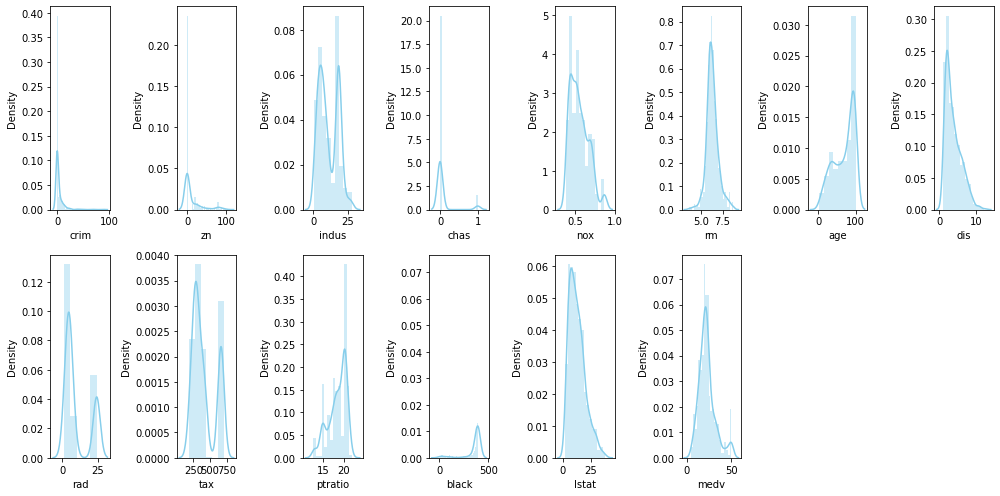

In [7]:
# adjust the figure size for better readability
plt.figure(figsize=(14,7))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:

1. Kolom `rm` memiliki distribusi yang sedikit skewed namun cenderung simetris.
2. Kolom `age`, `ptratio`, `black` berdistribusi skewed negatif sedangkan kolom lainnya cenderung berdistribusi skewed positif.

# Proses Pemodelan Menggunakan Analisis Regresi

## ***Linear Regression***

---



In [8]:
# split train test
from sklearn.model_selection import train_test_split

feature = data.drop(columns='medv')
target = data[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [9]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


***Observasi:***

Terdapat beberapa fitur yang memiliki skor VIF tinggi, diantaranya:
1. indus
2. nox
3. dis
4. rad
5. tax

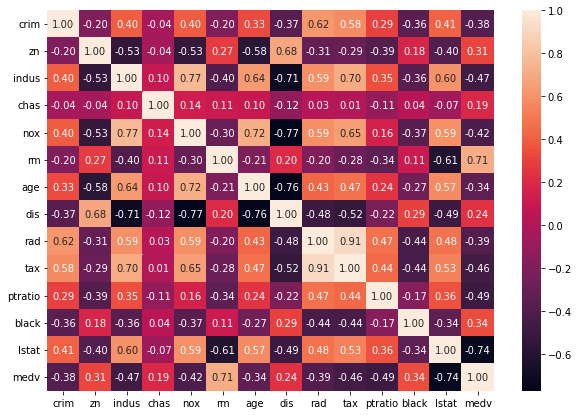

In [10]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

***Observasi :***

Berdasarkan heatmap correlation di atas terdapat 2 fitur yang berkorelasi tinggi (>= 0.8) yaitu fitur `tax` dan `rad` sebesar 0.91. Hal tersebut menandakan adanya multikolinearitas karena terdapat dua fitur yang redundant sehingga untuk mengatasinya diperlukan mendrop salah satu fitur tersebut yang memiliki korelasi paling rendah dengan target yaitu `medv`.
Fitur yang akan di drop adalah `rad` karena memiliki nilai absolute korelasi yang paling rendah dengan `medv` yaitu sebesar 0.39.

In [11]:
# Drop Multicollinear Features
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

In [12]:
# Recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.593872
2,zn,2.413664
3,indus,3.658237
4,chas,1.084671
5,nox,4.411973
6,rm,1.884987
7,age,2.977080
8,dis,4.166015
9,tax,3.331299
10,ptratio,1.776290


***Observasi :***

Berdasarkan hasil Recheck VIF score, masih terdapat beberapa fitur yang memiliki nilai VIF tinggi diantaranya:
1. indus
2. nox
3. dis

Untuk memastikan apakah fitur-fitur tersebut perlu di drop atau tidak dalam upaya mengatasi multikolinearitas maka dilakukan check lebih lanjut menggunakan heatmap correlation.

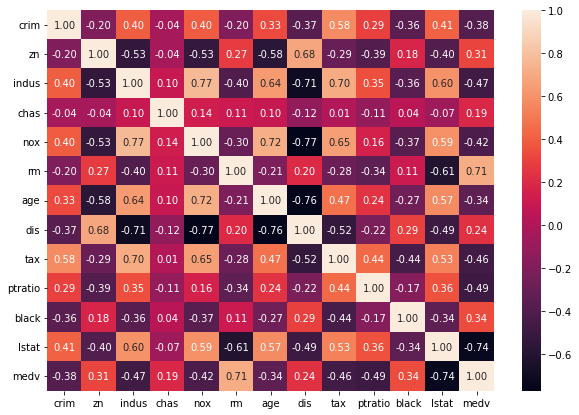

In [13]:
# Recheck heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

***Observasi:***

Berdasarkan hasil Recheck heatmap correlation di atas terlihat bahwa seluruh fitur memiliki nilai korelasi < 0.8 sehingga dapat dikatakan bahwa tidak ada lagi fitur yang perlu di drop karena tidak ada fitur yang saling redundant sehingga problem multikolinearitas telah teratasi.

## Model Training

In [14]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()

multi_reg.fit(X_boston_train, y_boston_train)

LinearRegression()

In [15]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,24.260870
1,crim,-0.081353
2,zn,0.022090
3,indus,-0.014986
4,chas,3.129739
5,nox,-15.547839
6,rm,4.726614
7,age,-0.009597
8,dis,-1.428513
9,tax,0.000966


## Model Diagnostic

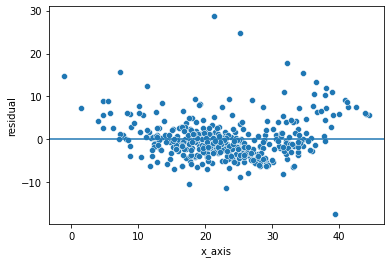

In [16]:
# calculate residuals
y_predict_train = multi_reg.predict(X_boston_train)
residual = y_boston_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


***Interpretasi:***

Berdasarkan residual plot di atas, diketahui bahwa:
1. Terdapat hubungan yang linear antara fitur dengan target.
2. Varians dari residual tidak konstan.
3. Residual tidak memiliki korelasi (independent observation).

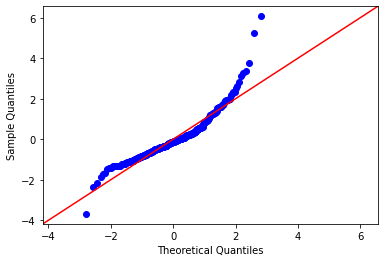

In [17]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

***Interpretasi:***

Berdasarkan QQ plot di atas, diketahui bahwa data cenderung tidak berdistribusi normal

In [18]:
# R^2 score
from sklearn.metrics import r2_score

r2_score(y_predict_train,y_boston_train)

0.6545881233153721

***Interpretasi:***

Nilai R-squared di atas menunjukkan bahwa fitur-fitur yang terdapat pada model regresi linear dapat menjelaskan variabel target sebesar 65.4 % atau  variabilitas yang dapat dimodelkan dari variabel target (`medv`) sebesar 65.4 %. Sehingga dapat dikatakan bahwa variabilitas dari model kurang bagus dalam menangkap variabiltas dari variabel target (`medv`).

## Model Evaluation

### Training Error

In [19]:
from sklearn.metrics import mean_squared_error


print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_boston_train))))

RMSE for training data is 4.722635459852961


### Testing Error

In [20]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = multi_reg.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()

In [21]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))

RMSE for testing data is 5.144992285668734


***Observasi :***

Berdasarkan hasil Training Error & Testing Error terlihat bahwa nilai RMSE pada Testing Error lebih besar daripada RMSE pada Training Error. Berdasarkan hal tersebut dapat dikatakan bahwa model yang dihasilkan mengalami Overfitting. Untuk mengatasinya dilakukan proses Regularized Regression.

#Regularized Regression

In [22]:
# Split data: train - validate - test
from sklearn.model_selection import train_test_split

feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

In [23]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


***Observasi :***

Terdapat beberapa fitur yang memiliki skor VIF tinggi, diantaranya:
1. indus
2. nox
3. age
4. dis
5. rad
6. tax
7. lstat

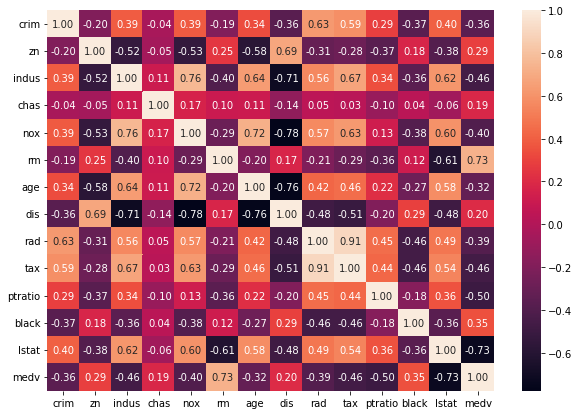

In [24]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

***Observasi :***

Berdasarkan heatmap correlation di atas terdapat 2 fitur yang berkorelasi tinggi (>= 0.8) yaitu fitur `tax` dan `rad` sebesar 0.91. Hal tersebut menandakan adanya multikolinearitas karena terdapat dua fitur yang redundant sehingga untuk mengatasinya diperlukan mendrop salah satu fitur tersebut yang memiliki korelasi paling rendah dengan target yaitu `medv`.
Fitur yang akan di drop adalah `rad` karena memiliki nilai absolute korelasi yang paling rendah dengan `medv` yaitu sebesar 0.39.

In [25]:
# Drop Multicollinear Features
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

In [26]:
# Recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


***Observasi :***

Berdasarkan hasil Recheck VIF score, masih terdapat beberapa fitur yang memiliki nilai VIF tinggi diantaranya:
1. indus
2. nox
3. age
4. dis
5. tax
6. lstat

Untuk memastikan apakah fitur-fitur tersebut perlu di drop atau tidak dalam upaya mengatasi multikolinearitas maka dilakukan check lebih lanjut menggunakan heatmap correlation.

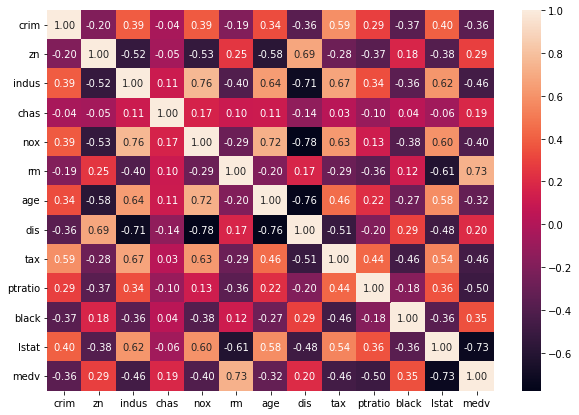

In [27]:
# Recheck heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

 ***Observasi:***

Berdasarkan hasil Recheck heatmap correlation di atas terlihat bahwa seluruh fitur memiliki nilai korelasi < 0.8 sehingga dapat dikatakan bahwa tidak ada lagi fitur yang perlu di drop karena tidak ada fitur yang saling redundant sehingga problem multikolinearitas telah teratasi.

## ***Ridge Regression***

---






### a. Train Multiple Models
with different alpha (lambda)

Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

In [28]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

### b. Choose the best lambda from the validation set

In [29]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579991
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


***Observasi:***

Model Regresi Ridge yang digunakan adalah model yang memiliki alpha dengan RMSE paling kecil. Berdasarkan hasil di atas terlihat bahwa RMSE model yang terkecil terdapat pada alpha = 10.

### c. Coefficient of Ridge Model
Model dengan alpha = 10 (ridge_reg_ten)

In [30]:
model_ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[model_ridge_best.intercept_] + list(model_ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


Berdasarkan koefisien ridge di atas, diperoleh Model Regresi Ridge sebagai berikut:

medv = 15.064666 - 0.071408 crim + 0.033030 zn - 0.067858 indus + 1.955801 chas - 1.568248 nox + 4.783168 rm - 0.011523 age - 1.260056 dis - 0.001976 tax - 0.697550 ptratio + 0.012729 black - 0.523827 Istat

###d. Evaluate the best models on the test data

In [31]:
# R-Squared

y_predict_train_ridge = model_ridge_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train_ridge, y_boston_train)))

R-squared for training data is 0.6542246087727177


***Interpretasi:***

Nilai R-squared di atas menunjukkan bahwa fitur-fitur yang terdapat pada model regresi ridge dapat menjelaskan variabel target sebesar 65.4% atau  variabilitas yang dapat dimodelkan dari variabel target (`medv`) sebesar 65.4 %. Sehingga dapat dikatakan bahwa variabilitas dari model dapat menangkap variabiltas dari variabel target (`medv`) dengan cukup bagus.

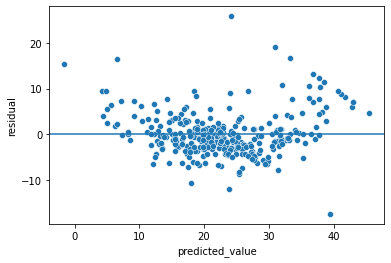

In [32]:
# calculate residuals
residual = y_boston_train - y_predict_train_ridge

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_ridge,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x='predicted_value', y='residual')
plt.axhline(0)
plt.show()

***Interpretasi:***

Berdasarkan residual plot di atas, diketahui bahwa:
1. Terdapat hubungan yang linear antara fitur dengan target.
2. Varians dari residual tidak konstan.
3. Residual tidak memiliki korelasi (independent observation).

### Testing Error

In [33]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = model_ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_boston_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_boston_test)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.2444816457044965
MAPE for testing data is 0.2622349874986081


***Interpretasi:***

1. Standard deviasi dari residual pada testing data sebesar 5.158908333657057.
2. Secara rata-rata, prediksi model menyimpang dengan nilai sebenarnya dengan `medv` sebagai variabel target sebesar 3.2444816457044965.
3. Nilai dari MAE sebesar 3.2373829552284934 equivalent dengan 26.2 % deviasi relative dari prediksi model dengan nilai sebenernya `medv` sebagai variabel target

### ***LASSO***


---





### a. Train Multiple Models
with different alpha (lambda)

In [35]:
from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
lasso_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_pointone = Lasso(alpha=0.1, random_state=42)
lasso_one = Lasso(alpha=1, random_state=42)
lasso_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_pointone.fit(X_boston_train, y_boston_train)
lasso_one.fit(X_boston_train, y_boston_train)
lasso_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

###b. Choose the best lambda from the validation set

In [36]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_pointzeroone,
          lasso_pointone,
          lasso_one,
          lasso_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.934105658639752
RMSE of Ridge regression model with alpha = 0.1 is 4.907145314259478
RMSE of Ridge regression model with alpha = 1.0 is 4.845855910636398
RMSE of Ridge regression model with alpha = 10 is 5.426622694252769


***Observasi:***

Model Lasso yang digunakan adalah model yang memiliki alpha dengan RMSE paling kecil. Berdasarkan hasil di atas terlihat bahwa RMSE model yang terkecil terdapat pada alpha = 1.

###c. Coefficient of Lasso Model
Model dengan alpha = 1 (lasso_one)

In [37]:
model_lasso_best = lasso_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[model_lasso_best.intercept_] + list(model_lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


Berdasarkan koefisien lasso di atas, diperoleh Model Lasso sebagai berikut:

medv = 25.823435 - 0.041076 crim + 0.025273 zn + 2.504122 rm + 0.022055 age - 0.599362 dis - 0.002994 tax - 0.666222 ptratio + 0.011400 black - 0.712433 Istat

### d. Evaluate the best models on the test data

In [38]:
# R-Squared

from sklearn.metrics import r2_score

y_predict_train_lasso = model_lasso_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train_lasso, y_boston_train)))

R-squared for training data is 0.5133022055846548


 *Interpretasi:*

Nilai R-squared di atas menunjukkan bahwa fitur-fitur yang terdapat pada model regresi ridge dapat menjelaskan variabel target sebesar 51.3 % atau  variabilitas yang dapat dimodelkan dari variabel target (`medv`) sebesar 51.3 %. Sehingga dapat dikatakan bahwa variabilitas dari model kurang bagus dalam menangkap variabiltas dari variabel target (`medv`).

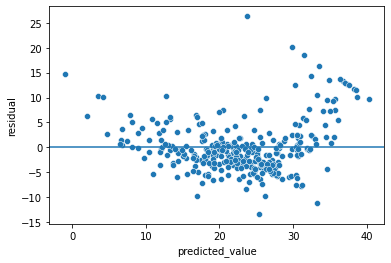

In [39]:
# calculate residuals
residual = y_boston_train - y_predict_train_lasso

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_lasso,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x='predicted_value', y='residual')
plt.axhline(0)
plt.show()

***Interpretasi:***

Berdasarkan residual plot di atas, diketahui bahwa:
1. Terdapat hubungan yang linear antara fitur dengan target.
2. Varians dari residual tidak konstan.
3. Residual tidak memiliki korelasi (independent observation).

### Testing Error

In [40]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = model_lasso_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_boston_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_boston_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.2950524268933147


***Interpretasi:***

1. Standard deviasi dari residual pada testing data sebesar 5.125494212319777.
2. Secara rata-rata, prediksi dari model menyimpang dengan nilai sebenarnya `medv` sebagai variabel target sebesar 3.3980507105960682.
3. Nilai dari MAE sebesar 3.4434460239732823 equivalent dengan 29.5% deviasi relative dari prediksi model dengan nilai sebenernya `medv` sebagai variabel target

# **Kesimpulan :**

**1.**  Berdasarkan hasil evaluasi dari kedua model, R-Squared yang diperoleh oleh Regresi Ridge lebih besar yaitu 65.4% dibandingkan dengan Model Lasso sebsar 51.3%. Selain itu, nilai error MAPE yang dimiliki oleh Regresi Ridge relatif lebih kecil dibandingan dengan error MAPE yang diperoleh dari Model Lasso, sehingga dapat dikatakan bahwa model yang diperoleh dari Regresi Ridge adalah model terbaik untuk memodelkan Prediksi Harga Rumah di Kota Boston.

Berikut adalah Model Regresi Ridge yang diperoleh.

medv = 15.064666 - 0.071408 crim + 0.033030 zn - 0.067858 indus + 1.955801 chas - 1.568248 nox + 4.783168 rm - 0.011523 age - 1.260056 dis - 0.001976 tax - 0.697550 ptratio + 0.0127290 black - 0.523827 Istat

***Interpretasi Model :***

1. Setiap penambahan **Criminal Rate** (`crim`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 0.071408.

2. Setiap penambahan **Residential land zoned proportion** (`zn`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan meningkatkan **predicting housing price** (`medv`) sebesar 0.033030.

3. Setiap penambahan **Non-retail business acres proportion** (`indus`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 0.067858.

4. Setiap penambahan **Is bounds with river** (`chas`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan meningkatkan **predicting housing price** (`medv`) sebesar 1.955801.

5. Setiap penambahan **Nitrogen oxides concentration** (`nox`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 1.568248.

6. Setiap penambahan **Number room averages** (`rm`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan meningkatkan **predicting housing price** (`medv`) sebesar 4.783168.

7. Setiap penambahan **Owner age proportion** (`age`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 0.011523.

8. Setiap penambahan **Weighted distance to cities** (`dis`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 1.260056.

9. Setiap penambahan **Tax rate** (`tax`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan meningkatkan **predicting housing price** (`medv`) sebesar 0.001976.

10. Setiap penambahan **Pupil-teacher ratio** (`ptratio`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing price** (`medv`) sebesar 0.697550.

11. Setiap penambahan **Black proportion** (`black`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan meningkatkan **predicting housing price** (`medv`) sebesar 0.0127290.

12. Setiap penambahan **Percent lower status**  (`Istat`) sebesar 1 satuan dan menganggap fitur-fitur lainnya memiliki nilai tetap maka akan menurunkan **predicting housing pric**e (`medv`) sebesar 0.523827.



**2.** Berdasarkan hasil interpretasi model, terlihat bahwa fitur yang dominan berpengaruh terhadap peningkatan Prediksi Harga Rumah di Kota Boston adalah **Number room averages** (`rm`) dengan peningkatan **Prediksi Harga Rumah** (`medv`) sebesar 4.783168 tiap penambahan 1 satuan. Sedangkan, fitur yang dominan berpengaruh terhadap penurunan Prediksi Harga Rumah di Kota Boston adalah **Nitrogen oxides concentration** (`nox`) dengan penurunan **Prediksi Harga Rumah** (`medv`) sebesar 1.568248 tiap penambahan 1 satuan.